In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Data prep

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('c_nc_dataset_colon_upd.dat', sep=' ')
batch = df.pop('Batch')
df

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM588828.CEL.gz,5.153745,8.066934,6.326157,5.105895,5.193241,5.141564,6.876999,4.966339,3.538702,8.561450,...,10.271258,8.055803,9.389502,12.079295,8.332986,11.261291,4.864378,8.630715,7.474338,9.126935
GSM588829.CEL.gz,5.396880,7.280434,5.765703,5.064006,5.849842,4.597636,6.967790,5.586804,4.391787,7.356280,...,10.560416,8.748044,8.862775,12.009874,7.983845,11.187982,4.945125,8.621514,7.187781,7.929738
GSM588830.CEL.gz,5.141072,8.180372,6.743461,5.304495,6.182938,5.093075,6.749377,4.853527,3.677063,8.278194,...,10.591489,8.776105,9.066105,12.583279,8.309542,11.106007,5.219222,9.146026,7.163117,8.640247
GSM588831.CEL.gz,5.150277,6.897691,7.331015,5.197166,5.884133,5.063821,7.001177,4.809303,3.489929,8.999523,...,10.635154,8.180941,9.795065,11.980179,8.164564,11.230465,5.032942,8.863478,7.694114,9.129055
GSM588832.CEL.gz,5.210397,6.855775,6.362509,5.002440,4.928103,5.519910,7.149327,5.061866,3.625434,8.516557,...,10.397311,8.276074,9.054660,11.872865,8.094597,11.543310,5.071483,8.810770,7.193868,8.564539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4277703_ColonCancer081.CEL.gz,5.189894,9.159772,6.301240,5.737991,6.386855,4.899655,7.340413,4.903800,3.339417,8.569275,...,10.228737,8.029407,9.504536,11.906369,8.345183,10.865049,4.943811,8.516441,7.125382,8.847421
GSM4277704_ColonCancer082.CEL.gz,5.691786,7.402380,7.380026,7.701702,8.797438,4.741639,6.543181,4.626991,3.439768,8.006691,...,10.724643,8.419439,10.405830,10.690183,8.752298,10.698606,4.951104,8.555100,6.793521,8.942656
GSM4277705_ColonCancer083.CEL.gz,5.168921,7.905812,6.623939,5.982862,7.330951,4.980802,6.491668,4.797178,3.562048,8.136553,...,10.650279,8.301369,9.260908,12.497906,8.456779,11.365222,4.916325,9.173151,6.997725,8.801575
GSM4277706_ColonCancer084.CEL.gz,5.454325,7.545165,7.140218,6.433067,8.021142,4.830395,6.778161,4.780164,3.579696,8.495400,...,10.562444,7.972288,9.676076,11.894883,8.326677,10.787109,4.944958,8.782694,6.865982,9.013338


In [4]:
label_arr = []

# 23878 labels - batch 0
label_arr += [1] * 35 + [0] * 24

# 71571 labels - batch 3
label_arr += [0] * 176

# 92921 labels - batch 2
label_arr += [1] * 59

# 143985 labels - batch 1
label_arr += [1] * 91

label_arr = np.array(label_arr)

In [5]:
corr = df.corr().abs()
corr

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
1,1.000000,0.321610,0.300309,0.322202,0.303575,0.120399,0.111672,0.026586,0.060672,0.114062,...,0.207598,0.040077,0.037589,0.454519,0.134256,0.252780,0.126605,0.219506,0.190590,0.042897
10,0.321610,1.000000,0.440463,0.481608,0.465389,0.100345,0.200063,0.124731,0.039107,0.253565,...,0.473207,0.143161,0.260245,0.558503,0.197024,0.261405,0.272738,0.180898,0.159012,0.311581
100,0.300309,0.440463,1.000000,0.477634,0.578259,0.265281,0.197457,0.355505,0.168658,0.258632,...,0.455375,0.071898,0.163847,0.471013,0.217035,0.244692,0.280582,0.233824,0.191274,0.110866
1000,0.322202,0.481608,0.477634,1.000000,0.769440,0.294962,0.151616,0.384270,0.109244,0.299151,...,0.377507,0.015293,0.025910,0.515038,0.281940,0.357100,0.193826,0.239620,0.159307,0.244253
10000,0.303575,0.465389,0.578259,0.769440,1.000000,0.445957,0.218405,0.423245,0.168247,0.395313,...,0.468835,0.048203,0.085375,0.472986,0.321891,0.301440,0.309197,0.298154,0.107232,0.331261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.252780,0.261405,0.244692,0.357100,0.301440,0.007388,0.076646,0.186618,0.034029,0.113044,...,0.211717,0.032285,0.094705,0.389480,0.232388,1.000000,0.208171,0.277515,0.098710,0.048303
9992,0.126605,0.272738,0.280582,0.193826,0.309197,0.130817,0.087101,0.156275,0.086435,0.262514,...,0.258701,0.020791,0.106694,0.149670,0.208354,0.208171,1.000000,0.220349,0.063111,0.204251
9993,0.219506,0.180898,0.233824,0.239620,0.298154,0.268825,0.159322,0.238411,0.026325,0.432004,...,0.358445,0.096298,0.048528,0.338059,0.158308,0.277515,0.220349,1.000000,0.196907,0.202442
9994,0.190590,0.159012,0.191274,0.159307,0.107232,0.053071,0.276614,0.032884,0.091317,0.169337,...,0.010079,0.162915,0.065578,0.135859,0.045020,0.098710,0.063111,0.196907,1.000000,0.206320


In [6]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
1,NaN,0.32161,0.300309,0.322202,0.303575,0.120399,0.111672,0.026586,0.060672,0.114062,...,0.207598,0.040077,0.037589,0.454519,0.134256,0.252780,0.126605,0.219506,0.190590,0.042897
10,NaN,NaN,0.440463,0.481608,0.465389,0.100345,0.200063,0.124731,0.039107,0.253565,...,0.473207,0.143161,0.260245,0.558503,0.197024,0.261405,0.272738,0.180898,0.159012,0.311581
100,NaN,NaN,NaN,0.477634,0.578259,0.265281,0.197457,0.355505,0.168658,0.258632,...,0.455375,0.071898,0.163847,0.471013,0.217035,0.244692,0.280582,0.233824,0.191274,0.110866
1000,NaN,NaN,NaN,NaN,0.769440,0.294962,0.151616,0.384270,0.109244,0.299151,...,0.377507,0.015293,0.025910,0.515038,0.281940,0.357100,0.193826,0.239620,0.159307,0.244253
10000,NaN,NaN,NaN,NaN,NaN,0.445957,0.218405,0.423245,0.168247,0.395313,...,0.468835,0.048203,0.085375,0.472986,0.321891,0.301440,0.309197,0.298154,0.107232,0.331261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.208171,0.277515,0.098710,0.048303
9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220349,0.063111,0.204251
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196907,0.202442
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206320


In [7]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
len(to_drop)

689

In [8]:
df.drop(to_drop, axis=1, inplace=True)
df

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM588828.CEL.gz,5.153745,8.066934,6.326157,5.105895,5.193241,5.141564,6.876999,4.966339,3.538702,8.561450,...,10.271258,8.055803,9.389502,12.079295,8.332986,11.261291,4.864378,8.630715,7.474338,9.126935
GSM588829.CEL.gz,5.396880,7.280434,5.765703,5.064006,5.849842,4.597636,6.967790,5.586804,4.391787,7.356280,...,10.560416,8.748044,8.862775,12.009874,7.983845,11.187982,4.945125,8.621514,7.187781,7.929738
GSM588830.CEL.gz,5.141072,8.180372,6.743461,5.304495,6.182938,5.093075,6.749377,4.853527,3.677063,8.278194,...,10.591489,8.776105,9.066105,12.583279,8.309542,11.106007,5.219222,9.146026,7.163117,8.640247
GSM588831.CEL.gz,5.150277,6.897691,7.331015,5.197166,5.884133,5.063821,7.001177,4.809303,3.489929,8.999523,...,10.635154,8.180941,9.795065,11.980179,8.164564,11.230465,5.032942,8.863478,7.694114,9.129055
GSM588832.CEL.gz,5.210397,6.855775,6.362509,5.002440,4.928103,5.519910,7.149327,5.061866,3.625434,8.516557,...,10.397311,8.276074,9.054660,11.872865,8.094597,11.543310,5.071483,8.810770,7.193868,8.564539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4277703_ColonCancer081.CEL.gz,5.189894,9.159772,6.301240,5.737991,6.386855,4.899655,7.340413,4.903800,3.339417,8.569275,...,10.228737,8.029407,9.504536,11.906369,8.345183,10.865049,4.943811,8.516441,7.125382,8.847421
GSM4277704_ColonCancer082.CEL.gz,5.691786,7.402380,7.380026,7.701702,8.797438,4.741639,6.543181,4.626991,3.439768,8.006691,...,10.724643,8.419439,10.405830,10.690183,8.752298,10.698606,4.951104,8.555100,6.793521,8.942656
GSM4277705_ColonCancer083.CEL.gz,5.168921,7.905812,6.623939,5.982862,7.330951,4.980802,6.491668,4.797178,3.562048,8.136553,...,10.650279,8.301369,9.260908,12.497906,8.456779,11.365222,4.916325,9.173151,6.997725,8.801575
GSM4277706_ColonCancer084.CEL.gz,5.454325,7.545165,7.140218,6.433067,8.021142,4.830395,6.778161,4.780164,3.579696,8.495400,...,10.562444,7.972288,9.676076,11.894883,8.326677,10.787109,4.944958,8.782694,6.865982,9.013338


In [9]:
rfe_pre = RFE(estimator=RandomForestClassifier(), n_features_to_select=300, step=.01, verbose=1)
selector_pre = rfe_pre.fit(df, label_arr)

Fitting estimator with 18667 features.
Fitting estimator with 18481 features.
Fitting estimator with 18295 features.
Fitting estimator with 18109 features.
Fitting estimator with 17923 features.
Fitting estimator with 17737 features.
Fitting estimator with 17551 features.
Fitting estimator with 17365 features.
Fitting estimator with 17179 features.
Fitting estimator with 16993 features.
Fitting estimator with 16807 features.
Fitting estimator with 16621 features.
Fitting estimator with 16435 features.
Fitting estimator with 16249 features.
Fitting estimator with 16063 features.
Fitting estimator with 15877 features.
Fitting estimator with 15691 features.
Fitting estimator with 15505 features.
Fitting estimator with 15319 features.
Fitting estimator with 15133 features.
Fitting estimator with 14947 features.
Fitting estimator with 14761 features.
Fitting estimator with 14575 features.
Fitting estimator with 14389 features.
Fitting estimator with 14203 features.
Fitting estimator with 14

In [10]:
filtered_df_pre = df.loc[:, selector_pre.support_]

In [11]:
rfe50 = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)
selector50 = rfe50.fit(filtered_df_pre, label_arr)

In [12]:
filtered_df_50 = filtered_df_pre.loc[:, selector50.support_]
filtered_df_50_arr = np.array(filtered_df_50)

In [13]:
rfe20 = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
selector20 = rfe20.fit(filtered_df_50, label_arr)

In [14]:
filtered_df_20 = filtered_df_50.loc[:, selector20.support_]
filtered_df_20_arr = np.array(filtered_df_20)

# Simple classifiers

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    decision_tree_acc.append(np.mean(cv))
decision_tree_acc

[0.844155844155844,
 0.8467532467532466,
 0.8181818181818181,
 0.8493506493506493,
 0.8415584415584416,
 0.8441558441558442,
 0.8467532467532468,
 0.8467532467532468,
 0.8467532467532466,
 0.8519480519480519,
 0.8545454545454545,
 0.844155844155844,
 0.8415584415584416,
 0.844155844155844,
 0.8467532467532468,
 0.8337662337662337,
 0.8519480519480519,
 0.8493506493506493]

In [17]:
decision_tree_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    decision_tree_acc.append(np.mean(cv))
decision_tree_acc

[0.844155844155844,
 0.825974025974026,
 0.8363636363636363,
 0.8363636363636363,
 0.8389610389610389,
 0.8363636363636363,
 0.825974025974026,
 0.8311688311688311,
 0.8493506493506493,
 0.8389610389610389,
 0.8389610389610389,
 0.8467532467532466,
 0.8467532467532466,
 0.8389610389610389,
 0.8389610389610389,
 0.8467532467532468,
 0.8337662337662337,
 0.8467532467532466]

## Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    random_forest_acc.append(np.mean(cv))
random_forest_acc

[0.922077922077922,
 0.9246753246753248,
 0.92987012987013,
 0.9194805194805195,
 0.909090909090909,
 0.922077922077922,
 0.9194805194805195,
 0.9194805194805195,
 0.922077922077922,
 0.9298701298701297,
 0.9246753246753248,
 0.9246753246753248,
 0.9246753246753248,
 0.9324675324675324,
 0.9246753246753248,
 0.9246753246753248,
 0.922077922077922,
 0.9246753246753248]

In [19]:
random_forest_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    random_forest_acc.append(np.mean(cv))
random_forest_acc

[0.9246753246753248,
 0.9376623376623376,
 0.9246753246753248,
 0.9376623376623376,
 0.922077922077922,
 0.9298701298701297,
 0.922077922077922,
 0.9116883116883117,
 0.9116883116883117,
 0.9168831168831169,
 0.9168831168831169,
 0.9142857142857143,
 0.9376623376623376,
 0.935064935064935,
 0.9298701298701297,
 0.922077922077922,
 0.922077922077922,
 0.9298701298701297]

## SVC

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
params = [{'svc__C':[10**x for x in range(-2, 10)], 'svc__gamma':[10**x for x in range(-5, 4)]}]
clf = GridSearchCV(pipeline, params)
clf.fit(filtered_df_20_arr, label_arr)
clf.best_params_

{'svc__C': 1, 'svc__gamma': 0.1}

In [21]:
clf = make_pipeline(StandardScaler(), SVC(C=clf.best_params_['svc__C'], gamma=clf.best_params_['svc__gamma']))
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
np.mean(cv)

0.9168831168831169

In [22]:
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
params = [{'svc__C':[10**x for x in range(-2, 10)], 'svc__gamma':[10**x for x in range(-5, 4)]}]
clf = GridSearchCV(pipeline, params)
clf.fit(filtered_df_50_arr, label_arr)
clf.best_params_

{'svc__C': 100, 'svc__gamma': 0.01}

In [23]:
clf = make_pipeline(StandardScaler(), SVC(C=clf.best_params_['svc__C'], gamma=clf.best_params_['svc__gamma']))
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
np.mean(cv)

0.9324675324675326

## XGBoost

In [24]:
import xgboost as xgb

xgb_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', max_depth=max_depth))
    params={'objective':'binary:logistic'}
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    xgb_acc.append(np.mean(cv))
xgb_acc

[0.8857142857142858,
 0.8727272727272727,
 0.8597402597402597,
 0.8675324675324676,
 0.8623376623376624,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065]

In [25]:
xgb_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', max_depth=max_depth))
    params={'objective':'binary:logistic'}
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    xgb_acc.append(np.mean(cv))
xgb_acc

[0.8987012987012987,
 0.8675324675324674,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065,
 0.864935064935065]

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_acc = []
for neighbors in range(1, 20):
    clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbors))
    cv = cross_val_score(clf, filtered_df_20, label_arr, cv=StratifiedKFold())
    knn_acc.append(np.mean(cv))
knn_acc

[0.9376623376623376,
 0.883116883116883,
 0.909090909090909,
 0.8779220779220779,
 0.8831168831168832,
 0.8623376623376624,
 0.8779220779220779,
 0.8519480519480519,
 0.8701298701298701,
 0.8441558441558442,
 0.8519480519480519,
 0.8467532467532466,
 0.8467532467532468,
 0.8363636363636363,
 0.8363636363636363,
 0.8259740259740258,
 0.825974025974026,
 0.8181818181818181,
 0.8155844155844157]

In [27]:
knn_acc = []
for neighbors in range(1, 20):
    clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbors))
    cv = cross_val_score(clf, filtered_df_50, label_arr, cv=StratifiedKFold())
    knn_acc.append(np.mean(cv))
knn_acc

[0.9584415584415584,
 0.8779220779220779,
 0.8935064935064935,
 0.8675324675324674,
 0.8961038961038961,
 0.8701298701298701,
 0.8779220779220779,
 0.8623376623376622,
 0.8727272727272728,
 0.8337662337662337,
 0.8545454545454545,
 0.8337662337662337,
 0.8389610389610389,
 0.8233766233766234,
 0.8363636363636363,
 0.8181818181818181,
 0.8207792207792208,
 0.8207792207792208,
 0.8233766233766234]

# MLP improved

### 20 features

In [28]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=20))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=4)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(hp.Choice('drop_' + str(i), values=[.0, .1, .2, .3])))
    model.add(Dense(1))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    learning_rate=hp.Choice('learning_rate', values=[.01, .001, .0001])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [29]:
import keras_tuner as kt
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
from keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(filtered_df_20_arr, label_arr, test_size=.2)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=20, factor=3, directory='kt_test20', overwrite=False)
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=.2, callbacks=[stop_early])

Using TensorFlow backend


2024-05-16 22:07:26.209962: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 22:07:26.768951: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Reloading Tuner from kt_test20/untitled_project/tuner0.json


In [30]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

2024-05-16 22:07:27.720922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 22:07:27.742361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 22:07:27.742975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 22:07:27.745134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 22:07:27.745715: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                924       
                                                                 
 batch_normalization (BatchN  (None, 44)               176       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 44)                0         
                                                                 
 dropout (Dropout)           (None, 44)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 45        
                                                                 
 batch_normalization_1 (Batc  (None, 1)                4         
 hNormalization)                                        

In [31]:
history = model.fit(X_train, y_train, epochs=50, validation_split=.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(best_epoch)

Epoch 1/50
8/8 [==============================] - 1s 42ms/step - loss: 0.6847 - accuracy: 0.6098 - val_loss: 0.4902 - val_accuracy: 0.6935
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 0.4942 - accuracy: 0.8171 - val_loss: 0.4386 - val_accuracy: 0.7581
Epoch 3/50
8/8 [==============================] - 0s 21ms/step - loss: 0.4360 - accuracy: 0.8699 - val_loss: 0.4148 - val_accuracy: 0.7581
Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 0.4129 - accuracy: 0.8943 - val_loss: 0.4017 - val_accuracy: 0.8065
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.3773 - accuracy: 0.9187 - val_loss: 0.3748 - val_accuracy: 0.8710
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.3548 - accuracy: 0.9268 - val_loss: 0.3519 - val_accuracy: 0.8871
Epoch 7/50
8/8 [==============================] - 0s 20ms/step - loss: 0.3287 - accuracy: 0.9390 - val_loss: 0.3355 - val_accuracy: 0.8710
Epoch 8/50
8/8 [===========

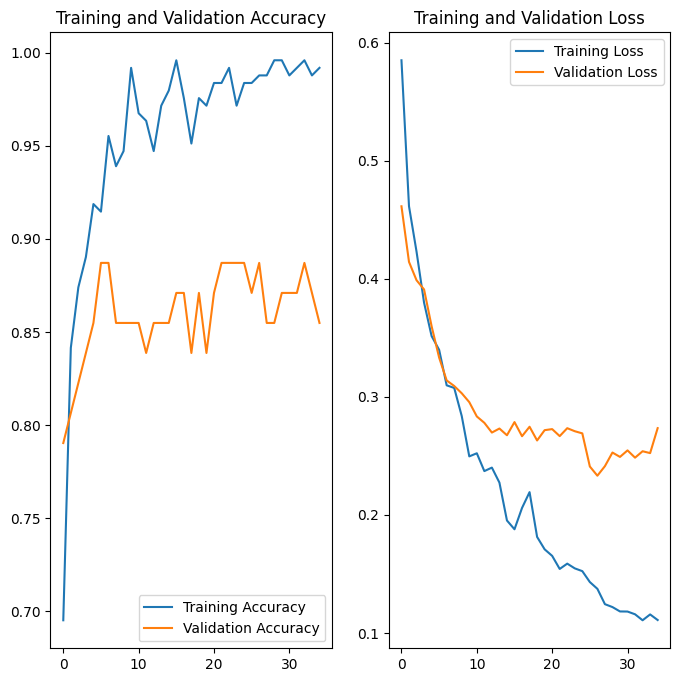

In [32]:
best_epoch = 20 if best_epoch < 20 else best_epoch

hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

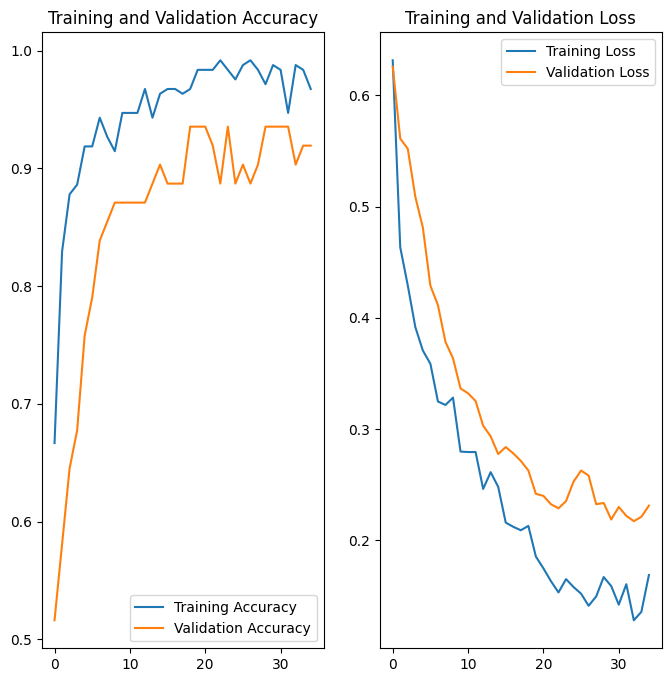

In [33]:
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
hypermodel.evaluate(X_test, y_test)

3/3 [==============================] - 0s 10ms/step - loss: 0.1488 - accuracy: 0.9610


[0.1488065868616104, 0.9610389471054077]

In [35]:
from sklearn.model_selection import KFold

nn_acc=[]
for train, test in KFold(shuffle=True).split(filtered_df_20_arr, label_arr):
    X_train = filtered_df_20_arr[train]
    X_test = filtered_df_20_arr[test]
    y_train = label_arr[train]
    y_test = label_arr[test]
    hypermodel = tuner.hypermodel.build(best_hps)
    hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)
    nn_acc.append(hypermodel.evaluate(X_test, y_test)[1])
print(np.mean(nn_acc))

3/3 [==============================] - 0s 8ms/step - loss: 0.2125 - accuracy: 0.9481
0.8727272629737854


In [36]:
from sklearn.model_selection import KFold

for rep in range(4):
    print('Training data repeats: ', rep)
    nn_acc=[]
    for train, test in KFold(shuffle=True).split(filtered_df_20_arr, label_arr):
        train_rep = np.array(train)
        for i in range(rep):
            train_rep = np.append(train_rep, train)
        ss = StandardScaler()
        rX_train = filtered_df_20_arr[train_rep]
        rX_test = filtered_df_20_arr[test]
        ss.fit(rX_train)
        rX_train = ss.transform(rX_train)
        rX_test = ss.transform(rX_test)
        ry_train = label_arr[train_rep]
        ry_test = label_arr[test]
        hypermodel = tuner.hypermodel.build(best_hps)
        hypermodel.fit(rX_train, ry_train, epochs=best_epoch, validation_split=.2, verbose=0)
        nn_acc.append(hypermodel.evaluate(rX_test, ry_test)[1])
    print(np.mean(nn_acc))

Training data repeats:  0
3/3 [==============================] - 0s 8ms/step - loss: 0.2014 - accuracy: 0.9091
0.9194805145263671
Training data repeats:  1
3/3 [==============================] - 0s 8ms/step - loss: 0.1056 - accuracy: 0.9481
0.9636363506317138
Training data repeats:  2
3/3 [==============================] - 0s 7ms/step - loss: 0.0996 - accuracy: 0.9740
0.96623375415802
Training data repeats:  3
3/3 [==============================] - 0s 8ms/step - loss: 0.1195 - accuracy: 0.9740
0.9792207717895508


In [38]:
import keras.backend as K
print(hypermodel.layers[3].rate, K.eval(hypermodel.optimizer.lr))

0.2 0.01


### 50 features

In [39]:
def build_model50(hp):
    model = Sequential()
    model.add(Input(shape=50))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=4)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(hp.Choice('drop_' + str(i), values=[.0, .1, .2, .3])))
    model.add(Dense(1))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    learning_rate=hp.Choice('learning_rate', values=[.01, .001, .0001])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(filtered_df_50_arr, label_arr, test_size=.2)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
tuner = kt.Hyperband(build_model50, objective='val_accuracy', max_epochs=20, factor=3, directory='kt_test50', overwrite=False)
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=.2, callbacks=[stop_early])

Reloading Tuner from kt_test50/untitled_project/tuner0.json


In [41]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 52)                2652      
                                                                 
 batch_normalization_56 (Bat  (None, 52)               208       
 chNormalization)                                                
                                                                 
 activation_56 (Activation)  (None, 52)                0         
                                                                 
 dropout_28 (Dropout)        (None, 52)                0         
                                                                 
 dense_57 (Dense)            (None, 1)                 53        
                                                                 
 batch_normalization_57 (Bat  (None, 1)                4         
 chNormalization)                                    

In [42]:
history = model.fit(X_train, y_train, epochs=50, validation_split=.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(best_epoch)

Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 0.6196 - accuracy: 0.6626 - val_loss: 0.5115 - val_accuracy: 0.7581
Epoch 2/50
8/8 [==============================] - 0s 22ms/step - loss: 0.4193 - accuracy: 0.9024 - val_loss: 0.5402 - val_accuracy: 0.7581
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 0.3953 - accuracy: 0.9472 - val_loss: 0.5061 - val_accuracy: 0.7742
Epoch 4/50
8/8 [==============================] - 0s 30ms/step - loss: 0.3580 - accuracy: 0.9715 - val_loss: 0.4461 - val_accuracy: 0.7581
Epoch 5/50
8/8 [==============================] - 0s 23ms/step - loss: 0.3456 - accuracy: 0.9634 - val_loss: 0.3729 - val_accuracy: 0.8226
Epoch 6/50
8/8 [==============================] - 0s 25ms/step - loss: 0.3110 - accuracy: 0.9675 - val_loss: 0.3195 - val_accuracy: 0.8548
Epoch 7/50
8/8 [==============================] - 0s 22ms/step - loss: 0.3060 - accuracy: 0.9756 - val_loss: 0.2985 - val_accuracy: 0.9032
Epoch 8/50
8/8 [===========

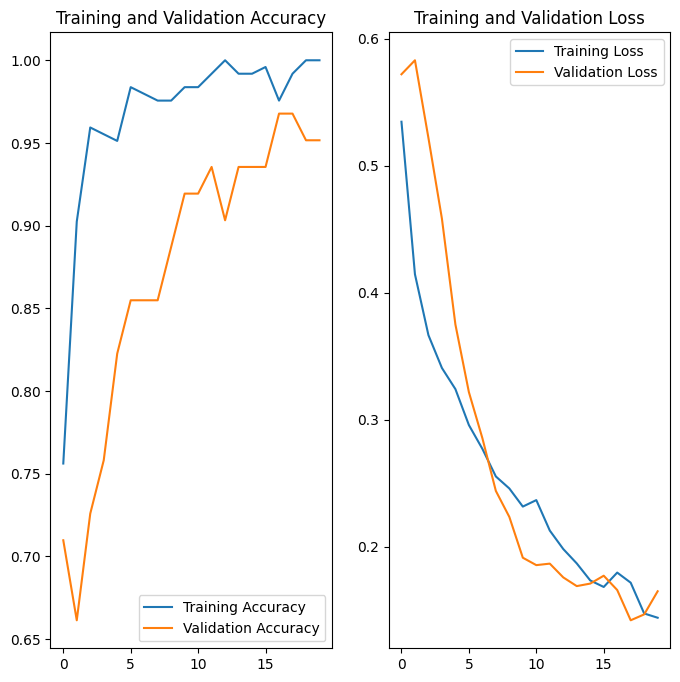

In [43]:
best_epoch = 20 if best_epoch < 20 else best_epoch

hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
for rep in range(4):
    print('Training data repeats: ', rep)
    nn_acc=[]
    for train, test in KFold(shuffle=True).split(filtered_df_50_arr, label_arr):
        train_rep = np.array(train)
        for i in range(rep):
            train_rep = np.append(train_rep, train)
        ss = StandardScaler()
        rX_train = filtered_df_50_arr[train_rep]
        rX_test = filtered_df_50_arr[test]
        ss.fit(rX_train)
        rX_train = ss.transform(rX_train)
        rX_test = ss.transform(rX_test)
        ry_train = label_arr[train_rep]
        ry_test = label_arr[test]
        hypermodel = tuner.hypermodel.build(best_hps)
        hypermodel.fit(rX_train, ry_train, epochs=best_epoch, validation_split=.2, verbose=0)
        nn_acc.append(hypermodel.evaluate(rX_test, ry_test)[1])
    print(np.mean(nn_acc))

Training data repeats:  0
3/3 [==============================] - 0s 8ms/step - loss: 0.1659 - accuracy: 0.9740
0.9506493330001831
Training data repeats:  1
3/3 [==============================] - 0s 8ms/step - loss: 0.0810 - accuracy: 0.9870
0.9740259647369385
Training data repeats:  2
3/3 [==============================] - 0s 8ms/step - loss: 0.2333 - accuracy: 0.9221
0.9740259647369385
Training data repeats:  3
3/3 [==============================] - 0s 8ms/step - loss: 0.1030 - accuracy: 0.9610
0.9636363506317138


In [46]:
print(hypermodel.layers[3].rate, K.eval(hypermodel.optimizer.lr))

0.2 0.01


# Logistic Regression

In [63]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math

### Base

In [64]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
print(cv, np.mean(cv))

[0.50649351 0.44155844 0.51948052 0.37662338 0.41558442] 0.451948051948052


In [65]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
print(cv, np.mean(cv))

[0.54545455 0.2987013  0.35064935 0.2987013  0.37662338] 0.37402597402597404


### With PCA - 20 features

In [66]:
pca = PCA(n_components=2)
ss = StandardScaler()
pca.fit(ss.fit_transform(filtered_df_20_arr))

PCA(n_components=2)

In [67]:
pca_arr = pca.transform(ss.fit_transform(filtered_df_20_arr))

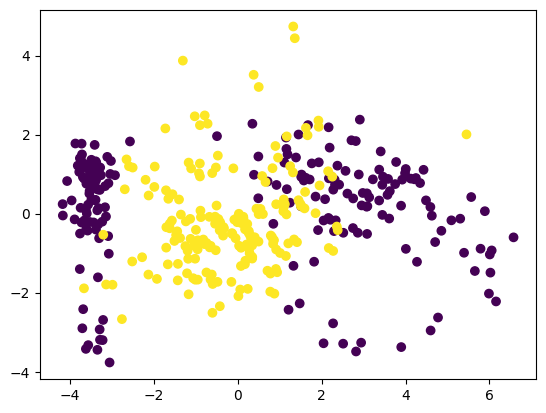

In [68]:
fig = plt.figure()
ax = plt.axes()
#ax.scatter(X_train[:,9], X_train[:,15], X_train[:,17], c=y_train)
ax.scatter(pca_arr[:,0], pca_arr[:,1], c=label_arr)
#ax.scatter(X_test[:,9], X_test[:,15], X_test[:,17], c=np.round(y_pred+2))
plt.show()

In [69]:
for i in range(2, 20):
    clf = make_pipeline(StandardScaler(), KernelPCA(n_components=i, kernel='rbf'), LogisticRegression(solver='lbfgs'))
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())

    print(i, cv, np.mean(cv))

2 [0.5974026  0.77922078 0.68831169 0.84415584 0.75324675] 0.7324675324675325
3 [0.68831169 0.83116883 0.77922078 0.84415584 0.77922078] 0.7844155844155845
4 [0.71428571 0.88311688 0.83116883 0.76623377 0.75324675] 0.7896103896103897
5 [0.7012987  0.87012987 0.81818182 0.84415584 0.80519481] 0.8077922077922078
6 [0.66233766 0.87012987 0.83116883 0.83116883 0.83116883] 0.8051948051948052
7 [0.66233766 0.85714286 0.84415584 0.83116883 0.84415584] 0.8077922077922078
8 [0.68831169 0.90909091 0.83116883 0.85714286 0.83116883] 0.8233766233766234
9 [0.64935065 0.90909091 0.84415584 0.85714286 0.85714286] 0.8233766233766234
10 [0.66233766 0.90909091 0.83116883 0.8961039  0.85714286] 0.8311688311688311
11 [0.67532468 0.94805195 0.87012987 0.92207792 0.84415584] 0.851948051948052
12 [0.66233766 0.94805195 0.88311688 0.92207792 0.84415584] 0.851948051948052
13 [0.66233766 0.94805195 0.88311688 0.92207792 0.83116883] 0.8493506493506494
14 [0.68831169 0.94805195 0.88311688 0.92207792 0.85714286] 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


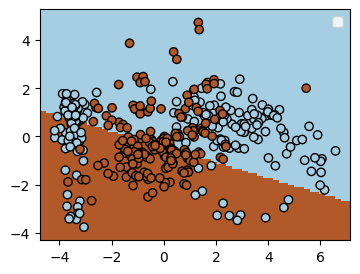

In [70]:
from sklearn.inspection import DecisionBoundaryDisplay

lr = LogisticRegression()
lr.fit(pca_arr, label_arr)
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    lr,
    pca_arr,#pca_arr_mod[:,:-1],
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

# Plot also the training points
#plt.scatter(pca_arr_mod[:, 0], pca_arr_mod[:, 1], c=pca_arr_mod[:,-1], edgecolors="k", cmap=plt.cm.Paired)
#plt.scatter(pca_arr[:, 0], pca_arr[:, 1], c=label_arr, edgecolors="k", cmap=plt.cm.Paired)
#plt.scatter(pca_arr[0:176, 0], pca_arr[0:176, 1], label='2', edgecolors="k", cmap=plt.cm.Paired)
#plt.scatter(pca_arr[176:176+59, 0], pca_arr[176:176+59, 1], label='1', edgecolors="k", cmap=plt.cm.Paired)
#plt.scatter(pca_arr[176+59:176+59+91, 0], pca_arr[176+59:176+59+91, 1], label='0', edgecolors="k", cmap=plt.cm.Paired)
plt.scatter(pca_arr[:, 0], pca_arr[:, 1], c=label_arr, edgecolors="k", cmap=plt.cm.Paired)
plt.legend()
plt.show()

### With PCA - 50 features

In [71]:
pca = PCA(n_components=2)
ss = StandardScaler()
pca.fit(ss.fit_transform(filtered_df_50_arr))

PCA(n_components=2)

In [72]:
pca_arr50 = pca.transform(ss.fit_transform(filtered_df_50_arr))

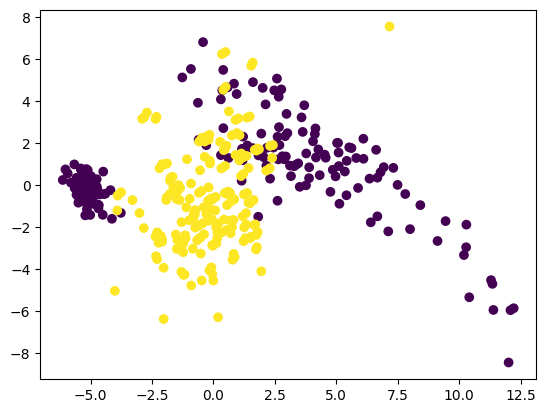

In [73]:
fig = plt.figure()
ax = plt.axes()
#ax.scatter(X_train[:,9], X_train[:,15], X_train[:,17], c=y_train)
ax.scatter(pca_arr50[:,0], pca_arr50[:,1], c=label_arr)
#ax.scatter(X_test[:,9], X_test[:,15], X_test[:,17], c=np.round(y_pred+2))
plt.show()

In [74]:
for i in range(2, 20):
    clf = make_pipeline(StandardScaler(), KernelPCA(n_components=i, kernel='rbf'), LogisticRegression(solver='lbfgs'))
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())

    print(i, cv, np.mean(cv))

2 [0.42857143 0.67532468 0.7012987  0.51948052 0.67532468] 0.6
3 [0.8961039  0.77922078 0.71428571 0.77922078 0.75324675] 0.7844155844155843
4 [0.71428571 0.92207792 0.85714286 0.88311688 0.85714286] 0.8467532467532466
5 [0.71428571 0.92207792 0.87012987 0.88311688 0.87012987] 0.8519480519480519
6 [0.7012987  0.8961039  0.87012987 0.88311688 0.85714286] 0.8415584415584414
7 [0.68831169 0.92207792 0.87012987 0.8961039  0.85714286] 0.8467532467532466
8 [0.68831169 0.90909091 0.88311688 0.8961039  0.88311688] 0.8519480519480519
9 [0.67532468 0.90909091 0.88311688 0.90909091 0.88311688] 0.8519480519480519
10 [0.67532468 0.90909091 0.87012987 0.90909091 0.88311688] 0.8493506493506493
11 [0.67532468 0.90909091 0.87012987 0.90909091 0.87012987] 0.8467532467532466
12 [0.66233766 0.90909091 0.85714286 0.90909091 0.87012987] 0.8415584415584416
13 [0.66233766 0.92207792 0.87012987 0.90909091 0.88311688] 0.8493506493506493
14 [0.66233766 0.92207792 0.87012987 0.8961039  0.88311688] 0.8467532467532